In [557]:
%matplotlib inline
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.datasets import make_blobs, make_moons

In [558]:
def add_intercept(X):
    # to simplify calculations we add ones column to data for multiplication with intercept
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def vizualize_linear_regression(X, y, theta):
    plt.scatter(X[:, 1], y, alpha=0.5)
    x_axis = np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01).reshape(-1, 1)
    y_axis = linear_predict(add_intercept(x_axis), theta)
    plt.plot(x_axis, y_axis, lw=2, c="r")
    plt.show()

def vizualize_logistic_regression(X, y, theta, treshold=0.5):
    plt.scatter(X[:, 1], X[:, 2], c=y, alpha=0.5)
    eps = 0.00000001
    x_axis = np.arange(np.min(X[:, 1]), np.max(X[:, 1]), 0.01).reshape(-1, 1)
    y_axis =  - (np.log((1-treshold)/treshold) + add_intercept(x_axis).dot(theta[:2])) / (theta[2] + eps)
    plt.plot(x_axis, y_axis, lw=2, c="r")
    plt.show()
    
def data_generator_linear_regression(n=100, intercept=0, coef=np.array([1]), var=0.1):
    # position to insert 'intercept'
    X = np.random.rand(n, coef.shape[0])
    theta = np.insert(coef, 0, intercept)
    y = add_intercept(X).dot(theta) + np.random.normal(0, var, (n))
    return X, y

def data_generator_logistic_regression(n=100, data="blobs"):
    if data == "blobs":
        X, y = make_blobs(n, centers=2)
    elif data == "moons":
        X, y = make_moons(n)
    return X, y

# Linear regression

(2 points) Implement predictor for linear regression:
$$ h_\theta (X) = \theta^TX $$

In [559]:
def linear_predict(X, theta):
    return X.dot(theta)

(3 points) Implement linear cost function:
$$ J(\theta) = \dfrac{1}{2n}\sum_{i=1}^{n}(h_\theta (X^{(i)})-y^{(i)})^2 $$

In [560]:
def linear_cost(X, y, theta):
    eps = 1e-5
    n = len(X)
    lin_reg_predictor = linear_predict(X, theta)
    return (1/(2*n + eps)) * np.sum(np.square(lin_reg_predictor - y))

(3 points) Implement gradient function for linear regression:
$$\frac{\partial}{\partial \theta_j} J(\theta) = \dfrac{1}{n}\sum_{i=1}^{n}\left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)} $$

In [561]:
def linear_gradient(X, y, theta):
    n = len(X)
    lin_reg_predictor = linear_predict(X, theta)
    return (1/n) * np.dot(X.T, (lin_reg_predictor - y))

(2 points) Implement weights initialization and weights update:
$$ \theta = \theta - \alpha \nabla_\theta J(\theta) $$

In [562]:
def fit_linear(X, y, lr=2, max_iter=10, epsilon=0.01, visualize=False):
    X = add_intercept(X)
    # randomly initialize weights vector with ones coresponding to X shape
    theta = np.random.rand(X.shape[1])
#     print("theta = ", theta)
    cost = linear_cost(X, y, theta)
    cost_list = [cost]
    for i in range(max_iter):
        # update values of weights based on gradient
        theta -= linear_gradient(X, y, theta) * epsilon
        cost = linear_cost(X, y, theta)
        cost_list.append(cost)
#         print(cost)
        if visualize == True:
            time.sleep(0.1)
            clear_output(wait=True)
            vizualize_linear_regression(X, y, theta)
        if np.abs(cost_list[-1] - cost_list[-2]) < epsilon:
            break
    return theta

(2 points) Try different parameters of lr and max_iter, what is optimal value? 
Experiment with different data generators.  
Write short summary on experiments.  
(In case of single dimensional data you can use vizualization.)

#### Summary:
The problem is that an algorithm not always find an optimal line for a separation. \
In Linear Regression we have to choose an average number of iterations to converge, not to miss the point of the function minimum, and not to stop the process of seraching the minimum before we find it.\
As smaller elipson we set, as more max_iter we can have, and vice versa.\
If we remove a random normal distribution coefficient from the `y` generation, we will see just a straight line of points.
The best variant is not to use max_iter too large or too small. I set `max_iter=8`, it is an average number. As bigger dataset we have as bigger max_iter we can set up.

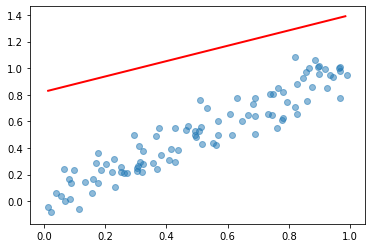

In [563]:
X, y = data_generator_linear_regression()
theta = fit_linear(X, y, lr = 16, max_iter=8, visualize=True)

In [564]:
theta

array([0.82193639, 0.57742017])

(4 points) Try to find coeficients just with linear algebra toolbox instead of optimization:

In [565]:
def least_squere(X, y):
    return np.linalg.pinv(X).dot(y)

(2 points) Compare precision of results and time of execution of least squered and optimization solutions  
Tip: Try to use *%timeit* from ipython magic

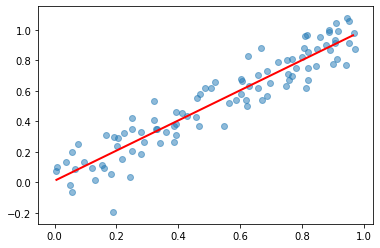

In [566]:
X, y = data_generator_linear_regression()
X = add_intercept(X)
theta = least_squere(X, y)
vizualize_linear_regression(X, y, theta)

#### Comparison:
Numpy Linalg tool is more precise, because we are using Moore-Penrose inverse to compute a best-fit least squares solution. In the case of manual search of the gradient, we limit ourself with the number of iterations, with which we re-calculate the gradient.\
We have to compare `fit linear` and `least_squere` functions.

In [567]:
%timeit fit_linear(X, y, lr = 16, max_iter=8, visualize=False)

92.5 µs ± 2.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [568]:
%timeit least_squere(X, y)

60.2 µs ± 3.23 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


As we can see the result, the solution with `least_squere` is better than `fit_linear` in lamost twice.

# Logistic regression 

(1 point) Implement sigmoid function:
$$ \sigma (z) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z}}  $$ 


In [569]:
import sys

In [570]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

Vizualize sigmoid to check your code:

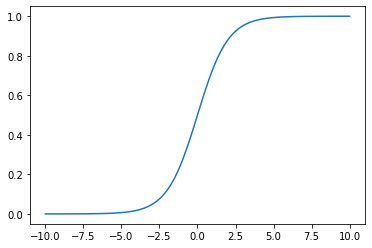

In [571]:
def vizualize_sigmoid(range_min=-10, range_max=10):
    x_axis = np.linspace(range_min,range_max,100)
    y_axis = sigmoid(x_axis)
    plt.plot(x_axis,y_axis)
    plt.show()

vizualize_sigmoid()

(1 point) Implement predictor for logistic regression:
$$ h_\theta (X) = \sigma (\theta^TX) $$

In [572]:
def logistic_predict(X, theta):
    return sigmoid(X.dot(theta))

(2 points) Implement cross entropy cost function:
$$ J(\theta) = -\dfrac{1}{n}\sum_{i=1}^{n}(y^{(i)}*log(h_\theta (X^{(i)}))+(1−y^{(i)})*log(1−h_\theta (X^{(i)}))) $$

In [573]:
def logistic_cost(X, y, theta):
    eps = 1e-5
    n = len(X)
    pred= logistic_predict(X, theta)
    return -(1.0/(n + eps)) * np.sum(np.dot(y.T, np.log(pred + eps)) + np.dot((1.0 - y).T, np.log(1.0 - pred + eps)))

(4 points) Calculate derivative from cross entropy and implement gradient step

In [574]:
def logistic_gradient(X, y, theta):
    n = len(X)
    log_reg_predictor = logistic_predict(X, theta)
    return (1.0/n) * np.dot(X.T, (log_reg_predictor - y))

(2 points) Similarly to previous example implement training procedure

In [575]:
def fit_logistic(X, y, lr=2, max_iter=10, epsilon=0.0001, visualize=False):
    X = add_intercept(X)
    # randomly initialize weights vector with ones coresponding to X shape
    theta = np.random.rand(X.shape[1])
    cost = logistic_cost(X, y, theta)
    cost_list = [cost]
    for i in range(max_iter):
        # update values of weights based on gradient
        theta -= logistic_gradient(X, y, theta) * epsilon
        cost = logistic_cost(X, y, theta)
        cost_list.append(cost)
        print(cost)
        if visualize == True:
            time.sleep(0.1)
            clear_output(wait=True)
            vizualize_logistic_regression(X, y, theta)
        if np.abs(cost_list[-1] - cost_list[-2]) < epsilon:
            break
    return theta

(2 points) Play with different parameters of lr and max_iter, try different datasets.  
Does algorithm always find optimal line for separation?   
What is a problem? How should optimal line look like to your mind?

LR - learning rate, also known as alpha. Learning rate is used to control the convergence.\
Small LR can slow down the convergence, and the large one can skip the min-point of the function.
The best variant is not to use lr too large or too small. I set `lr=10`, it is an average number for this particular dataset. As bigger dataset we have as bigger lr we can set up.

In [576]:
X, y = data_generator_logistic_regression()

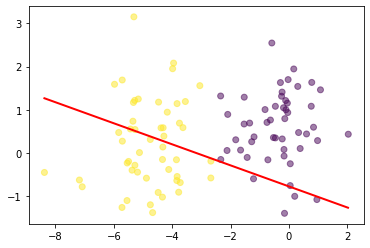

array([0.56671596, 0.17794644, 0.72969881])

In [577]:
fit_logistic(X, y, lr=8, visualize=True)

In [578]:
import unittest

class LinearRegresionTests(unittest.TestCase):

    X = np.array([
        [1, -0.5, 3, 1],
        [1, 8, -0.33, 5],
        [1, 0, 0, 0]
    ])
    y = np.array([40, 100, 12])
    y_bin = np.array([0, 1, 0])
    theta = np.array([2, 5, 7, 9])
    eps = 0.001

    def assertFloatEquals(self, a, b):
        self.assertTrue(np.abs(a - b) < self.eps)
    
    def assertArrayEquals(self, a, b):
        a = np.array(a)
        b = np.array(b)
        self.assertEqual(a.shape, b.shape)
        self.assertTrue(np.all(np.abs(a - b) < self.eps))
    
    def test_linear_predict_for_single_example(self):
        expected = 29.5
        actual = linear_predict(self.X[0], self.theta)
        self.assertFloatEquals(actual, expected)
    
    def test_linear_predict_for_multiple_examples(self):
        expected = [29.5, 84.69, 2.]
        actual = linear_predict(self.X, self.theta)
        self.assertArrayEquals(actual, expected)
        
    def test_linear_cost(self):
        expected = 74.107
        actual = linear_cost(self.X, self.y, self.theta)
        self.assertFloatEquals(actual, expected)
        
    def test_linear_gradient(self):
        expected = [-11.936, -39.076, -8.815, -29.016]
        actual = linear_gradient(self.X, self.y, self.theta)
        self.assertArrayEquals(actual, expected)
    
    def test_sigmoid(self):
        expected = [1., 1., 0.999]
        actual = sigmoid(self.y)
        self.assertArrayEquals(actual, expected)
    
    def test_logistic_predict_for_single_example(self):
        expected = 0.88
        actual = logistic_predict(self.X[2], self.theta)
        self.assertFloatEquals(actual, expected)
    
    def test_logistic_predict_for_multiple_examples(self):
        expected = [1, 1, 0.88]
        actual = logistic_predict(self.X, self.theta)
        self.assertArrayEquals(actual, expected)
        
    def test_logistic_cost(self):
        expected = 4.546
        actual = logistic_cost(self.X, self.y_bin, self.theta)
        self.assertFloatEquals(actual, expected)
        
    def test_logistic_gradient(self):
        expected = [0.626, -0.166,  1, 0.333]
        actual = logistic_gradient(self.X, self.y_bin, self.theta)
        self.assertArrayEquals(actual, expected)

In [579]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_linear_cost (__main__.LinearRegresionTests) ... ok
test_linear_gradient (__main__.LinearRegresionTests) ... ok
test_linear_predict_for_multiple_examples (__main__.LinearRegresionTests) ... ok
test_linear_predict_for_single_example (__main__.LinearRegresionTests) ... ok
test_logistic_cost (__main__.LinearRegresionTests) ... ok
test_logistic_gradient (__main__.LinearRegresionTests) ... ok
test_logistic_predict_for_multiple_examples (__main__.LinearRegresionTests) ... ok
test_logistic_predict_for_single_example (__main__.LinearRegresionTests) ... ok
test_sigmoid (__main__.LinearRegresionTests) ... ok

----------------------------------------------------------------------
Ran 9 tests in 0.009s

OK
